# Introduction
The purpose of this lesson is to expose students to libraries for preparing and manipulating "rectangular" data files (that is data which has both rows and columns, where each row has the same number of columns).

The next cell is one that will appear in some configuration as the first in nearly every notebook.  It imports the key libraries we are going to use in our analysis and model building.  In the first case, we will depend on pandas and numpy for our data manipulation and we'll leverage matplotlib as our graphical library.  We'll also use the seaborn library to show off a few plots and visuals that are not quite as readily accessible with the matplotlib library.

In [1]:
# Setup code
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import sys
sys.path.append('..')
from src.data import load_data, convert_to_bool

# Limit the precision to 4 significant digits
pd.set_option('display.precision',4)

## Boston Housing Dataset
Let's take a look at some basic data manipulation with pandas and understand how to get some data to work with.  In all of our examples, we'll use a pretty standard text format called (CSV) or comma-separated-values files.  This format is readable by nearly every statistical software package and by humans.  The first row is typically the name of the columns and each line of the file is a row of data with the values separated by commas.  The pandas library supports many different ways to load up a dataframe, which we will use as the primary mechanism for manipulating data in these notebooks.

### Business Context
Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)):

- **CRIM**: per capita crime rate by town
- **ZN**: proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS**: proportion of non-retail business acres per town
- **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX**: nitric oxides concentration (parts per 10 million)
- **RM**: average number of rooms per dwelling
- **AGE**: proportion of owner-occupied units built prior to 1940
- **DIS**: weighted distances to ﬁve Boston employment centers
- **RAD**: index of accessibility to radial highways
- **TAX**: full-value property-tax rate per 10,000
- **PTRATIO**: pupil-teacher ratio by town
- **B**: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town
- **LSTAT**: % lower status of the population
- **MEDV**: Median value of owner-occupied homes in 1000s
- **CAT. MEDV**: Is median value of owner-occupied home in tract above $30k (CAT.MEDV = 1) or not (CAT.MEDV = 0)

We can see that the input attributes have a mixture of units.

In [2]:
# Load up the housing dataset
housing_df = load_data('BostonHousing')
# Change the column to be more convenient (notice the space between . MEDV)
housing_df.rename(columns={'CAT. MEDV':'CAT_MEDV'},inplace=True)
convert_to_bool(housing_df, 'CAT_MEDV',inplace=True)
housing_df

/workspaces/Intermediate-Python/data/BostonHousing.csv


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.0063,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,False
1,0.0273,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,False
2,0.0273,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,True
3,0.0324,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,True
4,0.0691,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0626,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,False
502,0.0453,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,False
503,0.0608,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,False
504,0.1096,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,False


# Inspect data
One of the first things we want to do in our process is to take a look at the data we have and see what kinds of issues we might be dealing with.  For simple datasets, this can be a quick glance at a table of data, for move complex datasets or issues it will be helpful to use some kind of graphical analysis.

In the example above we see just 10 rows of the data (the first 5 and the last 5).  We can also inspect a few more from the front and a few more in the back using `head()` and `tail()`.


In [3]:
housing_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.0063,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,False
1,0.0273,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,False
2,0.0273,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,True
3,0.0324,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,True
4,0.0691,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,True
5,0.0299,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,False
6,0.0883,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,False
7,0.1446,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,False
8,0.2112,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,False
9,0.1700,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9,False


In [4]:
housing_df.tail(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
496,0.2896,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391,19.2,21.14,19.7,False
497,0.2684,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391,19.2,14.10,18.3,False
498,0.2391,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391,19.2,12.92,21.2,False
499,0.1778,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,15.10,17.5,False
500,0.2244,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,14.33,16.8,False
501,0.0626,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,False
502,0.0453,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,False
503,0.0608,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,False
504,0.1096,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,False
505,0.0474,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,11.9,False


We can clearly see that the dataset has 505 rows ( the number on the side is the index and shows us such) and we have already been told how many columns we have.  But we can also use a few handy features to get this information from our dataset.  

In [5]:
# Shape tells us the number of rows and columns
housing_df.shape

(506, 14)

We see from the ouput about that we have 506 rows and 14 columns, but we can't see all the columns - let's check out the column names and get an idea of the some descriptive statistics for each numerical column)

In [6]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
count,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,422
mean,3.6135,11.3636,11.1368,0.0692,0.5547,6.2846,68.5749,3.7950,9.5494,408.2372,18.4555,12.6531,22.5328,NaN
std,8.6015,23.3225,6.8604,0.2540,0.1159,0.7026,28.1489,2.1057,8.7073,168.5371,2.1649,7.1411,9.1971,NaN
min,0.0063,0.0000,0.4600,0.0000,0.3850,3.5610,2.9000,1.1296,1.0000,187.0000,12.6000,1.7300,5.0000,NaN
25%,0.0820,0.0000,5.1900,0.0000,0.4490,5.8855,45.0250,2.1002,4.0000,279.0000,17.4000,6.9500,17.0250,NaN
50%,0.2565,0.0000,9.6900,0.0000,0.5380,6.2085,77.5000,3.2074,5.0000,330.0000,19.0500,11.3600,21.2000,NaN
75%,3.6771,12.5000,18.1000,0.0000,0.6240,6.6235,94.0750,5.1884,24.0000,666.0000,20.2000,16.9550,25.0000,NaN


We can see from our data dictionary, provided above, that `CAT_MEDV` is meant to be a categorical value (boolean)- not a numeric value.  So the descriptive statistics for it don't make much sense.  We can see however that there are 2 unique values (good, True/False) that False is the most common and it occurs 422 out of of 506 times.

## Quick plots and charts
We've got some interesting data here and we can get some quick plots to see how the data is distributed.  For instance, we might be interested in how old the houses are are or what the crime stats are like.  With this we can use the built-in dataframe functions for plotting.

<AxesSubplot:>

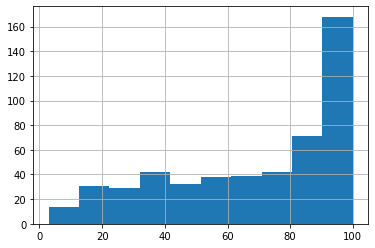

In [7]:
# It's always safe to use the `index` method to get a particular column
housing_df['AGE'].hist()

<AxesSubplot:>

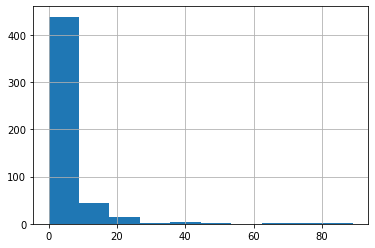

In [8]:
housing_df['CRIM'].hist()

We can also use the handy [seaborn](https://seaborn.pydata.org/) library which gives us a bit more control over the output.  There is lots and lots of examples of using the seaborn library on the website with a great tutorial.

Text(0.5, 1.0, 'proportion of non-retail business acres per town')

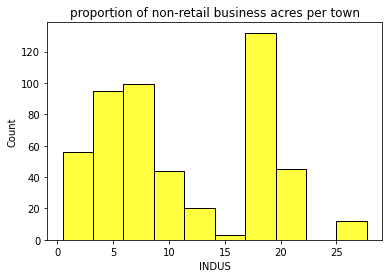

In [9]:
sns.histplot(data=housing_df,x='INDUS',color='yellow').set_title('proportion of non-retail business acres per town')

### Determining the interaction between a set of variables
Sometimes it is helpful to see many more dimensions of the data at once.  We can use color, size, shape and axises to show several dimensions, and one more commonly overlooked approach is to use faceting as yet another dimension.  Let's take a look at how the age of the houses vary by the relativeness to the Charles river.  

From here we can see that, as previously, there are many more homes not on the Charles River and also that the age of the homes is skewed heavily toward the older home ages.

(Check out the extra notebook [Visualization Samples](visualizationSamples.ipynb) to see another library and possible visualizations.) 

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

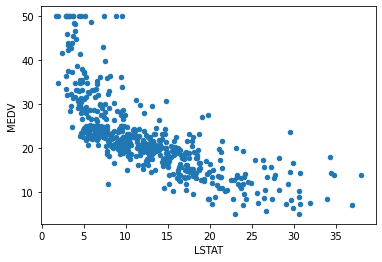

In [10]:
# Show a scatterplot relating LSTAT to MEDV
housing_df.plot.scatter(x='LSTAT', y='MEDV', legend=False)

<AxesSubplot:xlabel='CHAS', ylabel='LSTAT'>

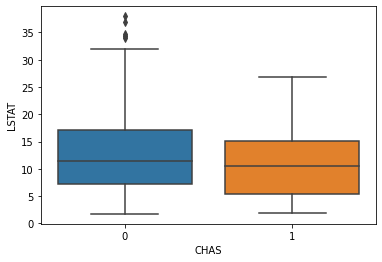

In [11]:
sns.boxplot(data=housing_df,x='CHAS',y='LSTAT')

We may also be interested in the relationship between a set of the variables so that we can identify which ones may prove to be over-influencing a regression model.  For this we can use two approaches, first we'll look at a set of charts that are related in a pair-wise chart or a correlation map.  First a pairwise graph.  A pairwise graph shows the relationship between these 4 different variables to each other in one simple clean chart.

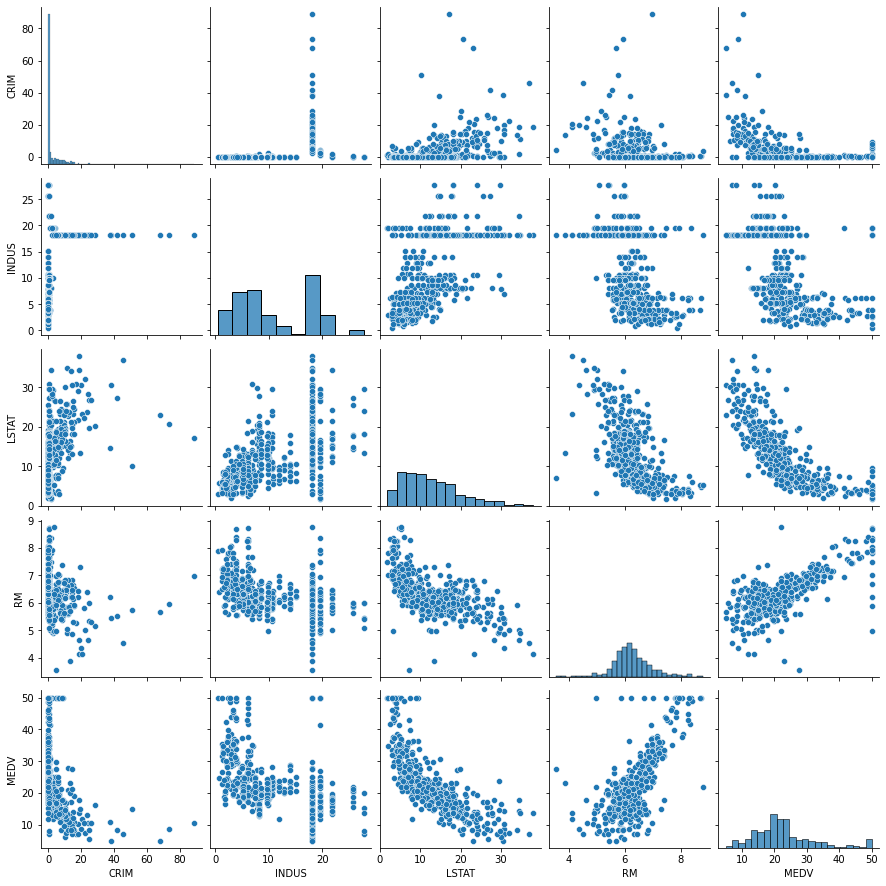

In [12]:
df = housing_df[['CRIM','INDUS','LSTAT',"RM","MEDV"]]
sns.pairplot(df)

# Data manipulation
Visualization is helpful and can be really useful in Python in lots of situations, especially if you need something super specific that can't be done other tools - or if you just need a quick visual of what's happening.  The real power unleashed by coding is to manipulate the data in a series of steps that can be repeated over and over again.  This is where `pandas` and Python shine.

## Where to get more help
* The [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/index.html) is very good
* The [10 minute guide to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) is a great place to start
* Pandas comparison to [spreadsheets](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_spreadsheets.html?highlight=filtering)
* There are alot of examples in the [pandas cookbook](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html), but if you can't find it there - try [stackoverflow](https://stackoverflow.com/)

First thing we need to know about dataframes is how they are accessed.  In other words, how do we get at specific rows/columns in the data.  Below are a few indexing techniques.

## Data Understanding 
The following dataset represents individuals and their health insurances charges from a US company.  Some of the key indicators that influence the cost of the insurance are in this dataset.
### Insurance
* __age__: age of primary beneficiary
* __sex__: insurance contractor gender, female, male
* __bmi__: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* __children__: Number of children covered by health insurance / Number of dependents
* __smoker__: Smoking
* __region__: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* __charges__: Individual medical costs billed by health insurance

In [13]:
# First get the data and take a quick look at the set
insurance_df = load_data('insurance')
insurance_df

/workspaces/Intermediate-Python/data/insurance.csv


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.9240
1,18,male,33.770,1,no,southeast,1725.5523
2,28,male,33.000,3,no,southeast,4449.4620
3,33,male,22.705,0,no,northwest,21984.4706
4,32,male,28.880,0,no,northwest,3866.8552
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.5483
1334,18,female,31.920,0,no,northeast,2205.9808
1335,18,female,36.850,0,no,southeast,1629.8335
1336,21,female,25.800,0,no,southwest,2007.9450


In [14]:
# Gather the first row
insurance_df.iloc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
charges     16884.924
Name: 0, dtype: object

In [15]:
# The rows between 10-20
insurance_df.iloc[10:20]

,age,sex,bmi,children,smoker,region,charges
10,25,male,26.220,0,no,northeast,2721.3208
11,62,female,26.290,0,yes,southeast,27808.7251
12,23,male,34.400,0,no,southwest,1826.8430
13,56,female,39.820,0,no,southeast,11090.7178
14,27,male,42.130,0,yes,southeast,39611.7577
15,19,male,24.600,1,no,southwest,1837.2370
16,52,female,30.780,1,no,northeast,10797.3362
17,23,male,23.845,0,no,northeast,2395.1716
18,56,male,40.300,0,no,southwest,10602.3850
19,30,male,35.300,0,yes,southwest,36837.4670


## Pandas Series
With dataframes, the columns of data are represented as a collection of [series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html?highlight=series#pandas.Series).

In [16]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

We can look at the data in single series

In [17]:
# All the ages
insurance_df['age']

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [18]:
# but if we want more than one column (series) we need to specify a list
list_of_columns = ['age','sex']
insurance_df[list_of_columns]

,age,sex
0,19,female
1,18,male
2,28,male
3,33,male
4,32,male
...,...,...
1333,50,male
1334,18,female
1335,18,female
1336,21,female


In [19]:
# More commonly we just use the list directly
insurance_df[['age','sex']]

,age,sex
0,19,female
1,18,male
2,28,male
3,33,male
4,32,male
...,...,...
1333,50,male
1334,18,female
1335,18,female
1336,21,female


We can use this for lots of great stuff like aggregating values in a column.

In [20]:
# What is the maximum charges
insurance_df['charges'].max()

63770.42801

### Filtering
Filtering is a bit more complex.  What we need is a boolean array of values to `index` our dataframe by.  I'll leave the [explanation to the experts](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html), but show a few examples.

In [21]:
# All the smokers
insurance_df[insurance_df['smoker']=='yes']

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.9240
11,62,female,26.290,0,yes,southeast,27808.7251
14,27,male,42.130,0,yes,southeast,39611.7577
19,30,male,35.300,0,yes,southwest,36837.4670
23,34,female,31.920,1,yes,northeast,37701.8768
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.5760
1314,30,female,23.655,3,yes,northwest,18765.8754
1321,62,male,26.695,0,yes,northeast,28101.3331
1323,42,female,40.370,2,yes,southeast,43896.3763


In [22]:
# Or using the query syntax
insurance_df.query('smoker=="yes"')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.9240
11,62,female,26.290,0,yes,southeast,27808.7251
14,27,male,42.130,0,yes,southeast,39611.7577
19,30,male,35.300,0,yes,southwest,36837.4670
23,34,female,31.920,1,yes,northeast,37701.8768
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.5760
1314,30,female,23.655,3,yes,northwest,18765.8754
1321,62,male,26.695,0,yes,northeast,28101.3331
1323,42,female,40.370,2,yes,southeast,43896.3763


In [23]:
# and now, just the male smokers
insurance_df.query('sex=="male" & smoker=="yes"')

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.7577
19,30,male,35.300,0,yes,southwest,36837.4670
29,31,male,36.300,2,yes,southwest,38711.0000
30,22,male,35.600,0,yes,southwest,35585.5760
34,28,male,36.400,1,yes,southwest,51194.5591
...,...,...,...,...,...,...,...
1301,62,male,30.875,3,yes,northwest,46718.1632
1303,43,male,27.800,0,yes,southwest,37829.7242
1304,42,male,24.605,2,yes,northeast,21259.3779
1307,32,male,28.120,4,yes,northwest,21472.4788


In [24]:
# We can also group our queries and then apply aggregates
# In this example, we are grouping by 'sex' and then using only the 'bmi' series, getting the mean()
insurance_df.groupby('sex')['bmi'].mean()

sex
female    30.3777
male      30.9431
Name: bmi, dtype: float64

In [25]:
# Or by two categories
# Here we group by two columns and still just looking at bmi
insurance_df.groupby(['sex','smoker'])['bmi'].mean()

sex     smoker
female  no        30.5395
        yes       29.6083
male    no        30.7706
        yes       31.5042
Name: bmi, dtype: float64

## Working on data in a series
The library is incredibly powerful, but just a few things we want to do.  Let's take a few examples.  

A few things to note
- all operations apply to all the items in the series by default, so no need to loop
- while we can change values in a series, more commonly we'll just create a new series and replace the old one (in one fellswoop)
- notice that what we are really doing is creating a new series anyway (below, we are rounding the numbers, but this creates a new series - unconnected to our dataframe)

In [26]:
# Create a new column that just says whether someone has children
# If the number of children is > 0 then True else False
insurance_df['has_children'] = insurance_df['children'] > 0
insurance_df

,age,sex,bmi,children,smoker,region,charges,has_children
0,19,female,27.900,0,yes,southwest,16884.9240,False
1,18,male,33.770,1,no,southeast,1725.5523,True
2,28,male,33.000,3,no,southeast,4449.4620,True
3,33,male,22.705,0,no,northwest,21984.4706,False
4,32,male,28.880,0,no,northwest,3866.8552,False
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.5483,True
1334,18,female,31.920,0,no,northeast,2205.9808,False
1335,18,female,36.850,0,no,southeast,1629.8335,False
1336,21,female,25.800,0,no,southwest,2007.9450,False


In [27]:
# Now, let's round the amount of the charges to 2 decimals
insurance_df['charges'] = round(insurance_df['charges'],2)
insurance_df['charges']

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.94
1337    29141.36
Name: charges, Length: 1338, dtype: float64

In [28]:
# assuming these charges are an annual rate, let's create a column of the monthly rate
insurance_df['monthly_charges']=round(insurance_df['charges']/12,2)
insurance_df

,age,sex,bmi,children,smoker,region,charges,has_children,monthly_charges
0,19,female,27.900,0,yes,southwest,16884.92,False,1407.08
1,18,male,33.770,1,no,southeast,1725.55,True,143.80
2,28,male,33.000,3,no,southeast,4449.46,True,370.79
3,33,male,22.705,0,no,northwest,21984.47,False,1832.04
4,32,male,28.880,0,no,northwest,3866.86,False,322.24
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.55,True,883.38
1334,18,female,31.920,0,no,northeast,2205.98,False,183.83
1335,18,female,36.850,0,no,southeast,1629.83,False,135.82
1336,21,female,25.800,0,no,southwest,2007.94,False,167.33


### Working with strings in the series
Working with strings in a series [are a little different](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.html), but they look alot like the python string functions.  We need to tell `pandas` what the type of data we want to work with is

In [29]:
# Working with a string, ensure all the male and female strings are UPPERCASED
insurance_df['gender']=insurance_df['sex'].str.upper()
insurance_df

,age,sex,bmi,children,smoker,region,charges,has_children,monthly_charges,gender
0,19,female,27.900,0,yes,southwest,16884.92,False,1407.08,FEMALE
1,18,male,33.770,1,no,southeast,1725.55,True,143.80,MALE
2,28,male,33.000,3,no,southeast,4449.46,True,370.79,MALE
3,33,male,22.705,0,no,northwest,21984.47,False,1832.04,MALE
4,32,male,28.880,0,no,northwest,3866.86,False,322.24,MALE
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.55,True,883.38,MALE
1334,18,female,31.920,0,no,northeast,2205.98,False,183.83,FEMALE
1335,18,female,36.850,0,no,southeast,1629.83,False,135.82,FEMALE
1336,21,female,25.800,0,no,southwest,2007.94,False,167.33,FEMALE


In [30]:
# or we could uppercase just the first letter of the region for instance
insurance_df['region'] = insurance_df['region'].str.title()
insurance_df

,age,sex,bmi,children,smoker,region,charges,has_children,monthly_charges,gender
0,19,female,27.900,0,yes,Southwest,16884.92,False,1407.08,FEMALE
1,18,male,33.770,1,no,Southeast,1725.55,True,143.80,MALE
2,28,male,33.000,3,no,Southeast,4449.46,True,370.79,MALE
3,33,male,22.705,0,no,Northwest,21984.47,False,1832.04,MALE
4,32,male,28.880,0,no,Northwest,3866.86,False,322.24,MALE
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,Northwest,10600.55,True,883.38,MALE
1334,18,female,31.920,0,no,Northeast,2205.98,False,183.83,FEMALE
1335,18,female,36.850,0,no,Southeast,1629.83,False,135.82,FEMALE
1336,21,female,25.800,0,no,Southwest,2007.94,False,167.33,FEMALE
